Dependencies 

In [26]:
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard

In [5]:
np.random.seed(42)
SIZE=256
img_data=[]


In [13]:
img= cv2.imread('c:\\Users\\admin\\Downloads\\monalisa.jpg',1)
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img= cv2.resize(img, (SIZE,SIZE))
img_data.append(img_to_array(img))


In [14]:
img_array=np.reshape(img_data, (len(img_data),SIZE,SIZE,3))
img_data= img_array.astype('float32')/255.


Creating the model 

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)       ┃ Output Shape  ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ conv2d (Conv2D)    │ (None, 256,   │     896 │
│                    │ 256, 32)      │         │
├────────────────────┼───────────────┼─────────┤
│ max_pooling2d      │ (None, 128,   │       0 │
│ (MaxPooling2D)     │ 128, 32)      │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_1 (Conv2D)  │ (None, 128,   │   2,312 │
│                    │ 128, 8)       │         │
├────────────────────┼───────────────┼─────────┤
│ max_pooling2d_1    │ (None, 64,    │       0 │
│ (MaxPooling2D)     │ 64, 8)        │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_2 (Conv2D)  │ (None, 64,    │     584 │
│                    │ 64, 8)        │         │
├────────────────────┼───────────────┼─────────┤
│ max_pooling2d_2    │ (None, 32,    │       0 │
│ (MaxPooling2D)     │ 32, 8)        │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_3 (Conv2D)  │ (None, 32,    │     584 │
│                    │ 32, 8)        │         │
├────────────────────┼───────────────┼─────────┤
│ up_sampling2d      │ (None, 64,    │       0 │
│ (UpSampling2D)     │ 64, 8)        │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_4 (Conv2D)  │ (None, 64,    │     584 │
│                    │ 64, 8)        │         │
├────────────────────┼───────────────┼─────────┤
│ up_sampling2d_1    │ (None, 128,   │       0 │
│ (UpSampling2D)     │ 128, 8)       │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_5 (Conv2D)  │ (None, 128,   │   2,336 │
│                    │ 128, 32)      │         │
├────────────────────┼───────────────┼─────────┤
│ up_sampling2d_2    │ (None, 256,   │       0 │
│ (UpSampling2D)     │ 256, 32)      │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_6 (Conv2D)  │ (None, 256,   │     867 │
│                    │ 256, 3)       │         │
└────────────────────┴───────────────┴─────────┘

 Total params: 8,163 (31.89 KB)

 Trainable params: 8,163 (31.89 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
tensorboard_callback = TensorBoard(log_dir="logs/", histogram_freq=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8996 - loss: 82.4154   
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.8999 - loss: 82.6625
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.8985 - loss: 83.0382
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.9001 - loss: 83.8119
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8971 - loss: 84.7914
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.9002 - loss: 85.5585
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.8987 - loss: 86.0726
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9001 - loss: 86.0872
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.8972 - loss: 85.1276
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.9004 - loss: 83.4250
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.8990 - loss: 81.9403
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 

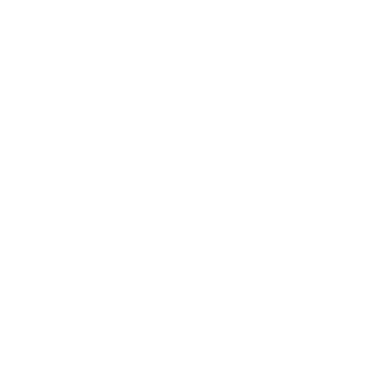

In [32]:
model.fit(img_array, img_array,
          epochs=50,
          shuffle=True,
         callbacks=[tensorboard_callback])

print("Neural network output")
pred = model.predict(img_array)
predicted_image= np.clip(pred[0].reshape(SIZE,SIZE,3),0,1)
plt.imshow(predicted_image)
plt.axis('off')
plt.show()